In [1]:
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
# This is similar to the exercise

def linearFunction(x, m, b):
    return m*x+b

x = np.arange(-4,4,0.5)
m = 2
b = 1

line = linearFunction(x,m,b)  # Creating a line using your function and the values given
rng = np.random.default_rng()
l_noise = 3 * rng.uniform(size=x.size)
noisy_line = line+l_noise

In [9]:
X = x.reshape((-1, 1))

# This is the solution a lot of people found. They used "line" to fit the regresion. However, "line" was only a helper variable
reg_1 = LinearRegression()
reg_1.fit(X, line)
line_pred_1 = reg_1.predict(X) 

In [11]:
# The correct solution is to use "noisy_line"
reg_2 = LinearRegression()
reg_2.fit(X, noisy_line)
line_pred_2 = reg_2.predict(X) 

## In the following plot you can see the difference between using "line" and "noisy_line"

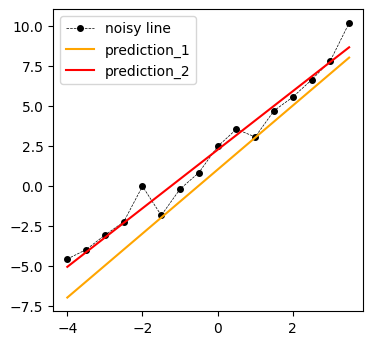

In [12]:
plt.figure(figsize=(4, 4), dpi=100)
plt.plot(x, noisy_line, '--', label='noisy line', color='black', marker='o', markersize=4, linewidth=0.5)

plt.plot(x, line_pred_1, label = 'prediction_1', color='orange')
plt.plot(x, line_pred_2, label = 'prediction_2', color='red')

plt.legend()

_________________________

## Another example for linear regression:

In [13]:
x, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                n_informative=1,
                                noise=10,#bias and standard deviation of the guassian noise
                                random_state=42)

# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..100000 
y = np.interp(y, (y.min(), y.max()), (40000, 100000))

In [14]:
print('Years of experience --> Salary €')
for i in range(5):
    print(x[i], '-->', y[i])

Years of experience --> Salary €
[15.88106767] --> 88915.35641160824
[12.10544757] --> 71284.22818747215
[6.98580519] --> 64082.5330791238
[13.12154364] --> 77251.18082448743
[9.57316511] --> 69060.79009164752


Text(0, 0.5, 'Salary €')

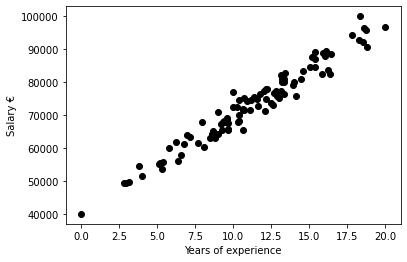

In [15]:
plt.scatter(x, y, c='black')
plt.xlabel("Years of experience")
plt.ylabel("Salary €")

In [20]:
## Linear Regression goes here
reg = LinearRegression()
reg.fit(x, y)
line_pred = reg.predict(x)

Text(0, 0.5, 'Salary €')

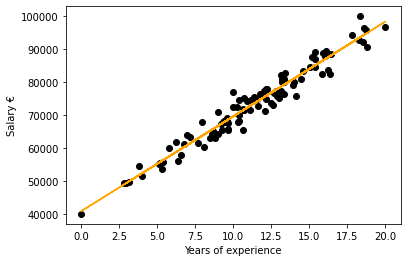

In [21]:
plt.scatter(x, y, c='black')
plt.plot(x, line_pred, color='orange')
plt.xlabel("Years of experience")
plt.ylabel("Salary €")

In [22]:
salary = int(reg.predict([[17.4432874983217431]]))
salary

91028